In [219]:
import numpy as np
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [214]:
def generate_label(x):
    prob_y_equals_one = 0.85 if x < 0.5 else 0.15
    return np.random.choice([1, 0], p=[prob_y_equals_one, 1 - prob_y_equals_one])

def bayes_optimal_classifier(x):
    return 1 if x < .5 else 0

vectorized_generate_labels = np.vectorize(generate_label)
vectorized_bayes_classifier = np.vectorize(bayes_optimal_classifier)

===========      n =   100       ===========
Logistic Regression Classifier Accuracy  : 0.88
Bayes Optimal Classifier Accuracy        : 0.88


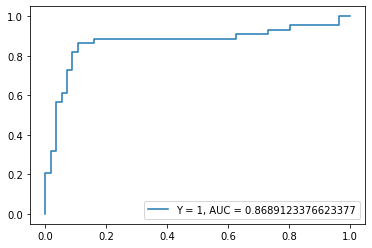

===========      n =  1000       ===========
Logistic Regression Classifier Accuracy  : 0.833
Bayes Optimal Classifier Accuracy        : 0.846


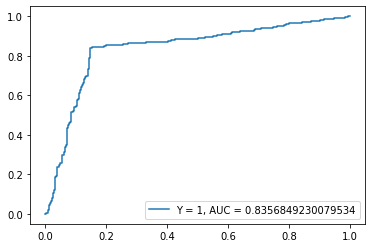

In [242]:
n_array = [100, 1000]

for n in n_array:
    X_train = np.random.uniform(0, 1, size=n).reshape(-1, 1)
    Y_train = vectorized_generate_labels(X_train).ravel()

    logistic_regression = LogReg()
    _ = logistic_regression.fit(X_train, Y_train)

    X_test = np.random.uniform(0, 1, size=n).reshape(-1, 1)
    Y_test = vectorized_generate_labels(X_test).ravel()

    Y_bayes_test = vectorized_bayes_classifier(X_test)
    Y_pred = logistic_regression.predict(X_test)

    print("===========      n = {:5d}       ===========".format(n))
    print("Logistic Regression Classifier Accuracy  : " + str(accuracy(Y_test, Y_pred)))
    print("Bayes Optimal Classifier Accuracy        : " + str(accuracy(Y_test, Y_bayes_test)))

    Y_pred_probability = logistic_regression.predict_proba(X_test)[::,1]
    false_positive_rate, true_positive_rate, _ = roc_curve(Y_test,  Y_pred_probability)
    auc = roc_auc_score(Y_test, Y_pred_probability)
    plt.plot(false_positive_rate,true_positive_rate,label="Y = 1, AUC = "+str(auc))
    plt.legend(loc=4)
    plt.show()
